## Importing Libraries

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the in-built 'Iris-Flower' dataset in seaborn

In [127]:
data=sns.load_dataset('iris')

In [128]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Visualisation of the data

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

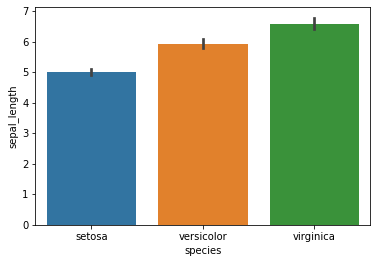

In [129]:
sns.barplot(x='species',y='sepal_length',data=data)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

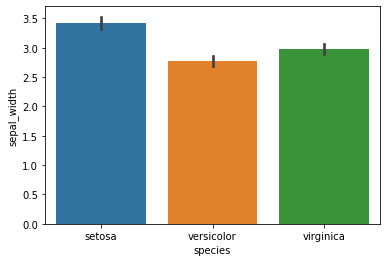

In [130]:
sns.barplot(x='species',y='sepal_width',data=data)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

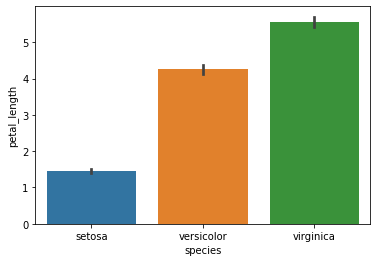

In [131]:
sns.barplot(x='species',y='petal_length',data=data)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

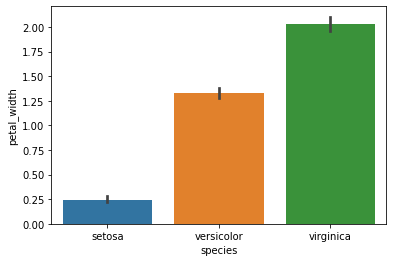

In [132]:
sns.barplot(x='species',y='petal_width',data=data)

### Standardisation of Data

In [133]:
a=data.drop('species',axis=1)

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
sc=StandardScaler()

In [136]:
sc.fit(a)

StandardScaler()

In [137]:
scaled_=sc.transform(a)

In [138]:
data_n=pd.DataFrame(scaled_,columns=data.columns[:-1])
data_n

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [163]:
data_new=pd.concat([data_n,data['species']],axis=1)

In [164]:
X=data_new.drop(['species'],axis=1)

In [165]:
y=data_new['species']

## Train Test Split

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [168]:
from sklearn.svm import SVC

In [169]:
sv=SVC()

In [170]:
sv.fit(X_train,y_train)
pred=sv.predict(X_test)

### Display the classification report,confusion matrix and accuracy score to estimate accuracy

In [195]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(pred,y_test)

0.9777777777777777

In [196]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [197]:
print(confusion_matrix(pred,y_test))

[[13  0  0]
 [ 0 19  0]
 [ 0  1 12]]


### Let's check for the better parameters in GridSearchCV through which there is scope of accuracy

In [186]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
gcv=GridSearchCV(SVC(),param_grid,verbose=3)

In [189]:
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=0.1, gamma=0.001; total time=   0.0s
[CV 2/5] END .............................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

### Best Parameters

In [190]:
gcv.best_params_

{'C': 1000, 'gamma': 0.0001}

In [192]:
prr=gcv.predict(X_test)

In [193]:
accuracy_score(prr,y_test)

0.9777777777777777

In [194]:
print(classification_report(prr,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

